In [39]:
# import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from random import randrange
import pygraphviz as pgv
from pyvis.network import Network
%matplotlib inline

In [40]:
pos_df = pd.read_csv('/homes/fabadmus/Internship/RA/target')
neg_df = pd.read_csv('/homes/fabadmus/Internship/RA/control')

In [41]:
full_df = pd.read_csv('/homes/fabadmus/Internship/RA/model_data_path')

In [42]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/RA/second_layer')

In [43]:
def define_layers():
    pass

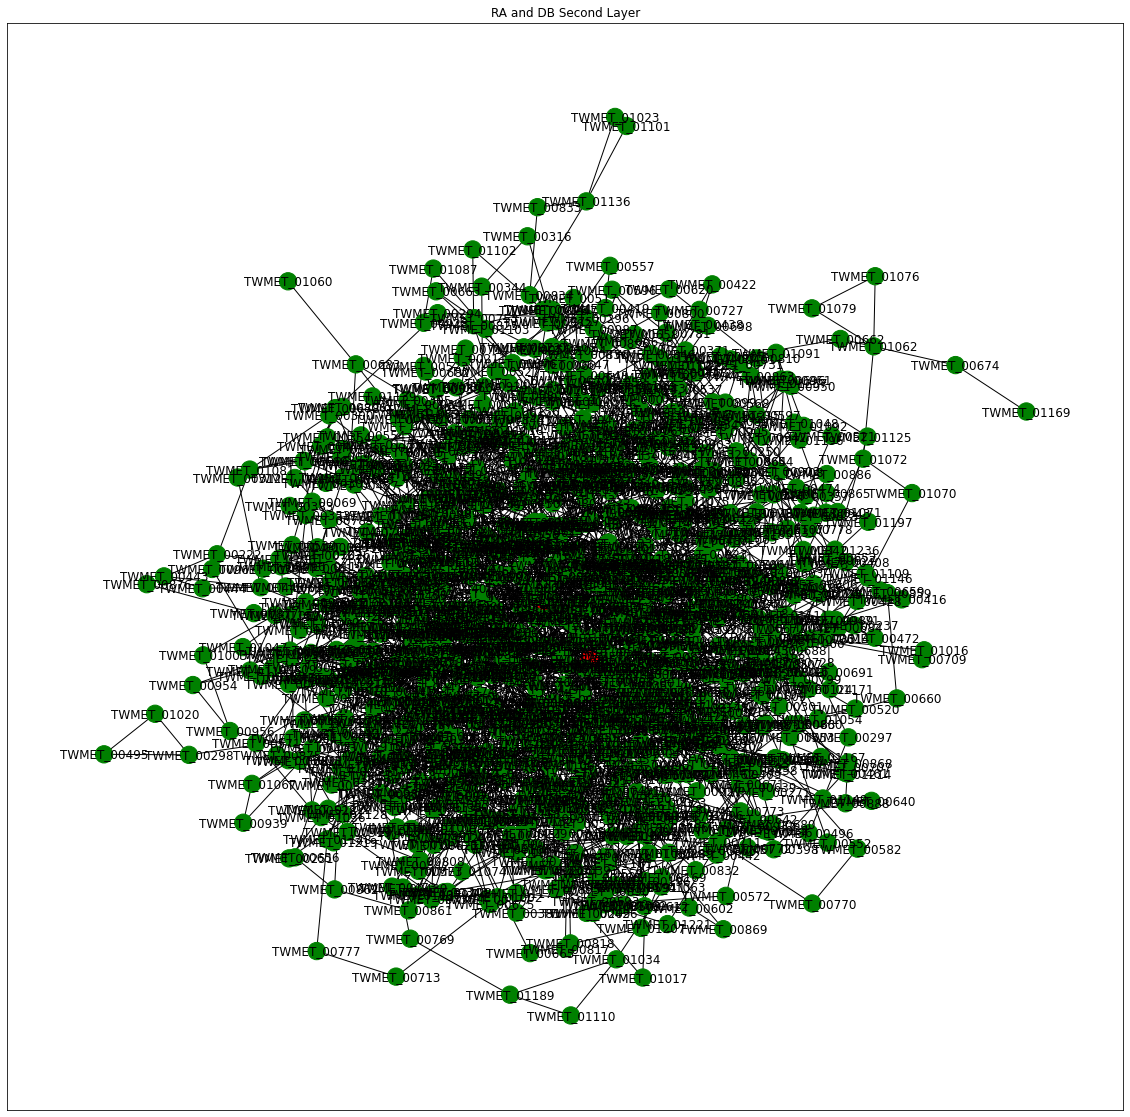

In [44]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/RA/second_layer')
g = nx.from_pandas_edgelist(full_second_layer, source='subject',
                            target='object')
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=10)

#pos = nx.nx_agraph.graphviz_layout(g, prog="twopi", args="")
# test[test == '0'] = '#C6442A'
# test[test == '1'] = '#9E2AC6'
color_map = ['red' if node.startswith("TWDIS") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'local_mi'), font_color="black",
);
plt.title('RA and DB Second Layer')
plt.show()

In [45]:
# convert the second_layer into a graph
second_layer = second_layer[second_layer.subject.str.startswith('TWDIS') == False]
G = nx.from_pandas_edgelist(second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')

In [46]:

# load the embeddings of the graph

embeddings = Word2Vec.load('/homes/fabadmus/Internship/RA/embedding')

# Convert embeddings to dataframe

emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

                        for n in G.nodes], index=G.nodes))

#emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00001,-0.512193,4.339878,2.023652,1.315338,-2.932526,-5.745180,1.433576,-2.970103,-4.279773,6.044311,-0.035105,-2.184933,-1.615743,1.547678,2.143796,0.688836
TWMET_00011,-3.092808,1.162289,1.664528,1.477933,-0.735835,-5.077650,3.814920,-1.970290,-1.902775,3.054875,-0.375619,-1.081654,-1.048486,0.755104,-0.687444,2.633026
TWMET_00411,0.551387,2.062104,1.486411,-0.173266,-1.536265,-2.528154,1.476885,-1.723863,-1.554722,2.089927,-0.873436,-0.513994,-0.050492,-0.417967,1.488527,0.938592
TWMET_00002,-3.206867,-0.893727,1.934336,1.798973,-0.636808,-2.498291,3.618149,-1.992115,-1.957138,4.245655,0.776291,-0.045822,-1.958961,-0.626332,-0.042208,1.580084
TWMET_00003,-2.373822,-0.146432,2.386550,2.067993,-0.335813,-3.245601,5.111926,-1.795014,-0.573775,5.294470,-0.433413,-0.624199,-2.008419,0.375549,0.535782,3.236902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_01218,0.113214,0.123153,0.139041,-0.136281,-0.098856,-0.179003,0.148241,0.021391,-0.032546,-0.094409,-0.245306,0.219946,-0.170925,-0.116439,0.185408,-0.074927
TWMET_01222,-0.056387,-0.006209,0.054329,-0.149139,-0.018246,0.057432,-0.046740,0.024761,0.030289,-0.099267,-0.132221,0.148714,-0.182601,0.191196,-0.004442,-0.103771
TWMET_01223,-0.090978,0.066354,0.167039,0.098337,-0.075040,-0.112054,0.051287,-0.126590,0.212761,-0.076853,-0.105519,-0.009851,-0.135970,-0.067807,0.230594,0.041086
TWMET_01230,-0.263895,-0.244780,0.307179,-0.148937,-0.233732,-0.190366,0.253272,0.164629,-0.137812,-0.169103,-0.019604,0.161719,0.226054,-0.153877,0.066770,0.408083


In [47]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [48]:
# create separate dataframes of embeddings bases on the sets
emb_df_pos = emb_df[emb_df.index.isin(pos)]
emb_df_pos['set'] = 'POS'
emb_df_neg = emb_df[emb_df.index.isin(neg)]
emb_df_neg['set'] = 'NEG'

/tmp/ipykernel_3030875/3669145909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_pos['set'] = 'POS'
/tmp/ipykernel_3030875/3669145909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_neg['set'] = 'NEG'


In [49]:
# inspecting
print(len(emb_df_pos))
print(len(emb_df_neg))

61
63


In [50]:
# create a dataframe for the training from the labeled concepts
model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00026,-0.911980,-2.335403,-1.070789,1.698389,-0.626531,-3.989942,3.000100,-3.458775,0.688360,3.364120,-1.490087,-1.790256,1.144205,-0.527375,4.610534,-1.041796,POS
TWMET_00019,0.037431,-2.056107,-1.300798,2.549411,-1.833097,-4.491278,4.207890,-2.647982,0.231105,3.897030,-0.608055,-1.478678,0.328096,-0.424765,4.423589,-1.082931,POS
TWMET_00941,-0.773053,-2.969592,1.386423,0.386891,-4.612612,-5.491659,0.220856,0.183651,4.062178,2.222278,-1.317665,-0.960350,-1.406937,-3.382809,0.349042,0.401418,POS
TWMET_00191,2.865067,1.036868,-1.003363,-0.915888,-4.972464,-1.545531,1.486506,-0.382007,2.364167,-0.317530,1.595481,2.226617,3.140960,-2.257649,6.146476,2.203515,POS
TWMET_00009,-2.329422,0.805086,1.115547,-0.843004,-0.865174,-3.900108,2.458257,0.855028,-3.109467,-4.598408,-0.307605,3.361395,-0.214854,-1.474348,2.077469,-0.636895,POS


In [51]:
# create validation data from the embedding data
validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
    subset=emb_df.columns[:-1], keep=False)
validation_df = validation_df[validation_df.index.str.startswith('TWDIS') == False]
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00001,-0.512193,4.339878,2.023652,1.315338,-2.932526,-5.745180,1.433576,-2.970103,-4.279773,6.044311,-0.035105,-2.184933,-1.615743,1.547678,2.143796,0.688836,NaN
TWMET_00011,-3.092808,1.162289,1.664528,1.477933,-0.735835,-5.077650,3.814920,-1.970290,-1.902775,3.054875,-0.375619,-1.081654,-1.048486,0.755104,-0.687444,2.633026,NaN
TWMET_00411,0.551387,2.062104,1.486411,-0.173266,-1.536265,-2.528154,1.476885,-1.723863,-1.554722,2.089927,-0.873436,-0.513994,-0.050492,-0.417967,1.488527,0.938592,NaN
TWMET_00002,-3.206867,-0.893727,1.934336,1.798973,-0.636808,-2.498291,3.618149,-1.992115,-1.957138,4.245655,0.776291,-0.045822,-1.958961,-0.626332,-0.042208,1.580084,NaN
TWMET_00003,-2.373822,-0.146432,2.386550,2.067993,-0.335813,-3.245601,5.111926,-1.795014,-0.573775,5.294470,-0.433413,-0.624199,-2.008419,0.375549,0.535782,3.236902,NaN


In [52]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1].values
y = model_df['set']

In [53]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':[3,5,7,10,15],'max_features':[0.5,'sqrt','log2'],
          'max_depth':[10,15,20],
          'class_weight':[{"POS":1,"NEG":1},'balanced'],
          'criterion':['entropy','gini']}


model1 = GridSearchCV(RandomForestClassifier(),param_grid, verbose=1,n_jobs=-1,scoring='roc_auc')
model1.fit(X_train,y_train)
print ('\n',model1.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits

 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=0.5, min_samples_leaf=5)


/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


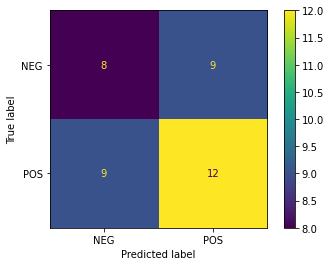

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


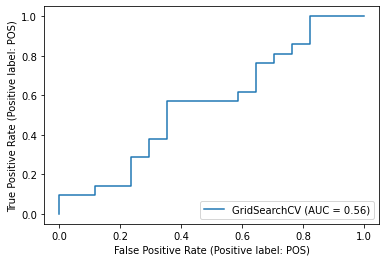

In [56]:
metrics.plot_roc_curve(model1, X_test, y_test)

In [57]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

model2 = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3)

score = cross_val_score(model2, X_train, y_train,  scoring="accuracy")
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3,
                       random_state=0)

In [58]:
print(f'Scores are: {score}')

Scores are: [0.55555556 0.64705882 0.82352941 0.47058824 0.47058824]


/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


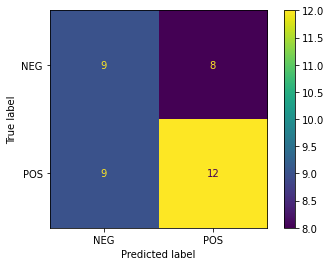

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


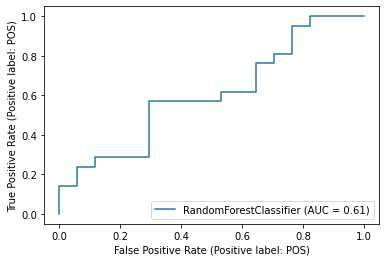

In [60]:
metrics.plot_roc_curve(model2, X_test, y_test)

In [61]:
# make predictions on the unknown
X_val = validation_df.iloc[:,:-1]

pred = model2.predict(X_val)

In [62]:
val_proba = model2.predict_proba(X_val)

In [63]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00193,0.133023,0.866977,POS
TWMET_01023,0.134802,0.865198,POS
TWMET_00958,0.149868,0.850132,POS
TWMET_00712,0.154076,0.845924,POS
TWMET_00957,0.156633,0.843367,POS
...,...,...,...
TWMET_00281,0.851004,0.148996,NEG
TWMET_00160,0.851776,0.148224,NEG
TWMET_00802,0.855484,0.144516,NEG
TWMET_00840,0.857406,0.142594,NEG


In [64]:
import requests
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df.head(10)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00193,0.133023,0.866977,POS,sialic acid
TWMET_01023,0.134802,0.865198,POS,lauryl gallate
TWMET_00958,0.149868,0.850132,POS,glycyl-leucine
TWMET_00712,0.154076,0.845924,POS,3-indoleacetonitrile
TWMET_00957,0.156633,0.843367,POS,glycyl-glycine
TWMET_00230,0.165334,0.834666,POS,ceramide
TWMET_01043,0.168616,0.831384,POS,methionine sulfoximine
TWMET_01024,0.169257,0.830743,POS,leucyl-alanine
TWMET_00339,0.175456,0.824544,POS,acetylserine
TWMET_00151,0.175578,0.824422,POS,acetone
